## Inciso d)

Para esto se pidió realizar un análizis de conglomerados, donde se usarán los datos del propio examen

In [9]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
X = np.array([[3,7,0],
              [2,13,2],
              [0,11,4],
              [1,9,3],
              [2,9,1],
              [3,5,0],
              [0,7,1]])
X

array([[ 3,  7,  0],
       [ 2, 13,  2],
       [ 0, 11,  4],
       [ 1,  9,  3],
       [ 2,  9,  1],
       [ 3,  5,  0],
       [ 0,  7,  1]])

## KMeans

Como se pidieron realizar 2 métodos diferentes, primero se usará un método no jerárquico, k means.

Primero se usará el método del codo para definir la K que mejor agrupe nuestros datos. Donde se puede observar que la posible mejor k es 2 o 3.

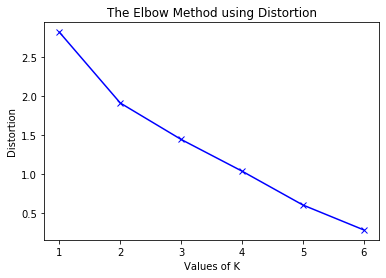

In [3]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,7) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

## Para k = 2

In [4]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [5]:
kmeans.labels_

array([0, 1, 1, 1, 0, 0, 0])

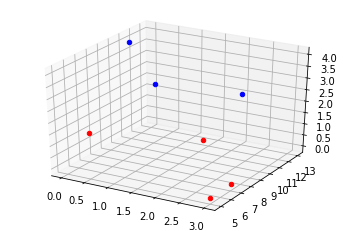

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = {0:"r",1:"b",2:"g"}
for xyz,i in zip(X,kmeans.labels_):
    ax.scatter(xyz[0],xyz[1],xyz[2],c=colors[i])
plt.show()

## Para k = 3

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

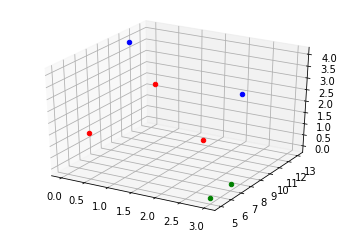

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = {0:"r",1:"b",2:"g"}
for xyz,i in zip(X,kmeans.labels_):
    ax.scatter(xyz[0],xyz[1],xyz[2],c=colors[i])
plt.show()

## Ward método

Y como segundo y último método se usará uno jerárquico, Ward o también conocida como Varianza mínima

Primero es necesario saber la cantidad de clusters, para ello se hace un dendograma con el cual gracias a este se puede confirmar con exactitud que la mejor K es 3.

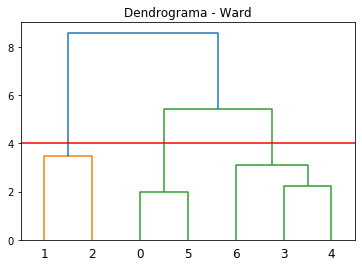

In [12]:
Z = linkage(X,"ward")
dendrogram(Z,show_contracted=True,truncate_mode="lastp")
plt.axhline(y=4,c="r")
plt.title("Dendrograma - Ward")
plt.show()

El resultado que nos dió fue exactamente los mismo que con KMeans k=3

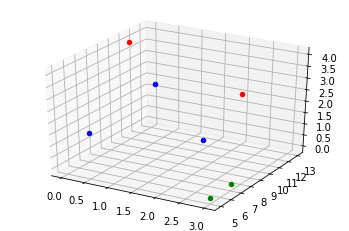

In [14]:
clst = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward").fit(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = {0:"r",1:"b",2:"g"}
for xyz,i in zip(X,clst.labels_):
    ax.scatter(xyz[0],xyz[1],xyz[2],c=colors[i])
plt.show()